## <center> Go to piazza and open today's lecture notes in the hub! </center>
## <center> https://piazza.com/class/jzioyk40mhs6r2 </center>
## <center> Let's go to tophat for attendance! </center>
## <center> https://app.tophat.com/e/245218 </center>

## Admin
- **October 24:** I will go through some of the home work problems.
   - please collect the top 3 problems you'd like me to go over (e.g., HW3  problem 1a).
   - I'll ask you to vote on tophat on thursday and the problems with the most votes will be covered.
- **October 29:** Midterm exam
   - it's an open-book coding exam
   - we will use the hub (fingers crossed)
   - you can use whatever materials you'd like (lecture notes, stakcoverflow, pandas and sklearn help)
   - the only restriction is that you are not allowed to communicate with anyone in any way during the exam.
- **October 31:** Guest lecturer
   - August Guang from CCV will talk about their data science project. They analyzed survey data on how people percieve tipping points in time series data and what we can learn from that.
- **November:** back to our regularly scheduled program 

## Mud card
- **Is there ever a case where you would do brute force over gradient decent? did we go over brute force for teaching purposes?**
   - You would never use brute force. Last class's coding material was for teaching purposes only. 


## Regularization and Logistic Regression

By the end of this lecture, you will be able to
- Describe why regularization is important and what are the two types of regularizations
- Describe the logistic regression model
- Describe the cost function with and without regularization in logistic regression


## Recap gradient descent

Linear regression model:

<center>$y_i' = \theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij} $</center>

The cost/loss/objective function:
<center>$L(\theta) = \frac{1}{n}\sum_{i=1}^{n}(y_i'-y_i)^2 = \frac{1}{n}\sum_{i=1}^{n}(\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}- y_i)^2$</center>

Let's visualize $L(\theta)$.

### The cost function from last lecture (lin. reg. with one feature)

<center><img src="figures/cost_function.png" width="600"></center>

### How do we find the best $\theta$ values?
- start with arbitrary initial $\theta$ values
- repeat until convergence:
<center>$\theta_j := \theta_j - l \frac{\partial L(\theta)}{\partial \theta_j} $, </center>
<center>where $\frac{\partial L(\theta)}{\partial \theta_j}$ is the gradient of the cost function at the current $\theta$ location and $l$ is the learning rate.</center>

   - the gradient tells us which way the cost function is the steepest
   - the learning rate tells us how big of a step we take in that direction

### The gradient descent path from last lecture
<center><img src="figures/cost_function_with_path.png" width="600"></center>

## <font color='LIGHTGRAY'>Regularization and Logistic Regression</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **Describe why regularization is important and what are the two types of regularization**
- <font color='LIGHTGRAY'>Describe the logistic regression model</font>
- <font color='LIGHTGRAY'>Describe the cost function with and without regularization in logistic regression</font>


## Let's revisit the bias-variance tradeoff example from lecture 2!

In [1]:
# load packages and generate data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

# the true function to generate y (gaussian noise is added later)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# fix the seed so code is reproducable
np.random.seed(10)

# generate n_samples points
n_samples = 40

# generate data
x = np.random.rand(n_samples)
y = true_fun(x) + np.random.randn(n_samples) * 0.1 # noise added here

In [2]:
df = pd.DataFrame()
n_ftrs = 10
for i in range(n_ftrs):
    df['x'+str(i+1)] = x**(i+1)
df['y'] = y
print(df.head())
df.to_csv('data/regression_example.csv',index=False)

         x1        x2        x3            x4            x5            x6  \
0  0.771321  0.594936  0.458886  3.539483e-01  2.730076e-01  2.105764e-01   
1  0.020752  0.000431  0.000009  1.854537e-07  3.848527e-09  7.986443e-11   
2  0.633648  0.401510  0.254416  1.612103e-01  1.021507e-01  6.472758e-02   
3  0.748804  0.560707  0.419860  3.143926e-01  2.354184e-01  1.762822e-01   
4  0.498507  0.248509  0.123884  6.175684e-02  3.078622e-02  1.534715e-02   

             x7            x8            x9           x10         y  
0  1.624219e-01  1.252794e-01  9.663058e-02  7.453316e-02 -0.749989  
1  1.657343e-12  3.439309e-14  7.137237e-16  1.481116e-17  1.014724  
2  4.101452e-02  2.598878e-02  1.646774e-02  1.043476e-02 -0.947898  
3  1.320008e-01  9.884272e-02  7.401381e-02  5.542183e-02 -0.959785  
4  7.650660e-03  3.813908e-03  1.901260e-03  9.477913e-04 -0.576467  


## We split data into train and test!

In [3]:
from sklearn.model_selection import train_test_split
X = df.loc[:,df.columns != 'y']
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)
print(np.shape(X_train),np.shape(y_train))
print(np.shape(X_test),np.shape(y_test))

(32, 10) (32,)
(8, 10) (8,)


## Train linear regression models on n features, check train and test scores

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
# arrays to save train and test MSE scores
train_MSE = np.zeros(n_ftrs)
test_MSE = np.zeros(n_ftrs)
thetas = []
# do the fit
for i in range(n_ftrs):
    # load the linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:,:i+1], y_train)
    thetas.append(lin_reg.coef_)
    # train and test scores
    train_MSE[i] = mean_squared_error(y_train,lin_reg.predict(X_train[:,:i+1]))
    test_MSE[i] = mean_squared_error(y_test,lin_reg.predict(X_test[:,:i+1]))


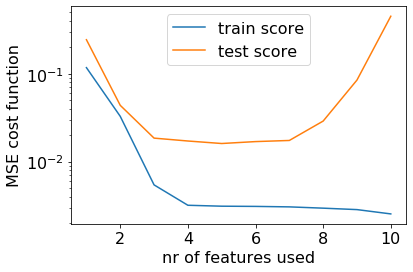

In [5]:
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

plt.plot(range(1,n_ftrs+1),train_MSE,label='train score')
plt.plot(range(1,n_ftrs+1),test_MSE,label='test score')
plt.semilogy()
plt.xlabel('nr of features used')
plt.ylabel('MSE cost function')
plt.legend()
plt.savefig('figures/train_test_MSE.png',dpi=300)
plt.show()

## Exercise 1
Based on the MSE scores or the figure, how many polinomials should we use for best tradeoff between bias and variance?

### 1) We can't just keep adding features like this with a realistic dataset
- the house price dataset: in what order would we add the features?
- the feautres there are not polinomials of the first feature
- we want to use all the features and not a subset!

### 2) Overfitting manifests as large theta values

In [6]:
for theta in thetas:
    print(theta)

[-2.30703339]
[-6.40614035  4.57385802]
[-1.18150122 -9.53780742 10.09245881]
[  1.36913193 -22.70537131  32.58938287 -12.16262094]
[  0.57994793 -16.30253089  13.8266015   10.59836495  -9.74311575]
[ 4.97140825e-02 -9.87378152e+00 -1.57180115e+01  7.25378065e+01
 -6.97831281e+01  2.18483991e+01]
[  -1.24661631   11.14286961 -148.53762066  478.12449236 -710.79377441
  526.89836431 -156.88203718]
[ 1.35948171e+00 -4.33033982e+01  3.10768847e+02 -1.47288328e+03
  3.84201587e+03 -5.39329205e+03  3.86416357e+03 -1.11130401e+03]
[-2.72085829e+00  6.43199432e+01 -8.47990819e+02  4.91524121e+03
 -1.61282963e+04  3.14680874e+04 -3.59250256e+04  2.21080524e+04
 -5.65666720e+03]
[ 4.17079421e+00 -1.55311357e+02  2.06039159e+03 -1.52517148e+04
  6.54870321e+04 -1.71441833e+05  2.78004690e+05 -2.72404094e+05
  1.47647841e+05 -3.39634490e+04]


## Regularization to the rescue!
- let's change the cost function and add a <font color='RED'>penalty term</font> for large thetas
- **Lasso regression**: regularize using the l1 norm of theta:
   
<center>$L(\theta) = \frac{1}{n}\sum_{i=1}^{n}[(\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}- y_i)^2] + \color{red}{ \frac{\alpha}{m} \sum_{j=0}^{m}|\theta_j|}$</center>   
   
- **Ridge regression**: regularize using the l2 norm of theta:
   
<center>$L(\theta) = \frac{1}{n}\sum_{i=1}^{n}[(\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}- y_i)^2] + \color{red}{\frac{\alpha}{m} \sum_{j=0}^{m} \theta_j^2}$</center>

- $\alpha$ is the regularization parameter (positive number), it describes how much we penalize large thetas

- With the cost function changed, the derivatives in gradient descent need to be updated too!

## Feature selection with Lasso regularization
- Least Absolute Shrinkage and Selection Operator
- cost = MSE + $\alpha$ * l1 norm of $\theta$
<center>$L(\theta) = \frac{1}{n}\sum_{i=1}^{n}[(\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}- y_i)^2] + \color{red}{ \frac{\alpha}{m} \sum_{j=0}^{m}|\theta_j|}$</center>  
- ideal for feature selection
- as $\alpha$ increases, more and more feature weights are reduced to 0.

In [7]:
from  sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = np.logspace(-5,0,21)
thetas = []

# do the fit
for i in range(len(alpha)):
    # load the linear regression model
    lin_reg = Lasso(alpha=alpha[i])
    lin_reg.fit(X_train, y_train)
    thetas.append(lin_reg.coef_)

/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05479910836324398, tolerance: 0.0018115588446257847
  positive)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05027836095101662, tolerance: 0.0018115588446257847
  positive)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.043713391094030045, tolerance: 0.0018115588446257847
  positive)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/linear_model/coordinate_des

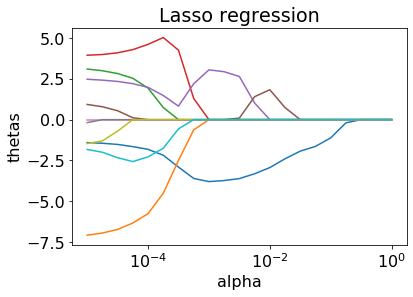

In [8]:
plt.plot(alpha, thetas)
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('thetas')
plt.title('Lasso regression')
plt.savefig('figures/lasso_coefs.png',dpi=300)
plt.show()

## Exercise 2
How many features are selected if $\alpha = 10^{-4}$?

## The bias-variance tradeoff with Ridge regularization
- cost = MSE + $\alpha$ * l2 norm of $\theta$
<center>$L(\theta) = \frac{1}{n}\sum_{i=1}^{n}[(\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}- y_i)^2] + \color{red}{\frac{\alpha}{m} \sum_{j=0}^{m} \theta_j^2}$</center>

- as $\alpha$ approaches 0, we reproduce the linear regression weights
- small $\alpha$ creates high variance
- large $\alpha$ creates high bias

In [9]:
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alpha = np.logspace(-16,1,100)

# arrays to save train and test MSE scores
train_MSE = np.zeros(len(alpha))
test_MSE = np.zeros(len(alpha))

thetas = []

# do the fit
for i in range(len(alpha)):
    # load the linear regression model
    lin_reg = Ridge(alpha=alpha[i])
    lin_reg.fit(X_train, y_train)
    thetas.append(lin_reg.coef_)
    # train and test scores
    train_MSE[i] = mean_squared_error(y_train,lin_reg.predict(X_train))
    test_MSE[i] = mean_squared_error(y_test,lin_reg.predict(X_test))

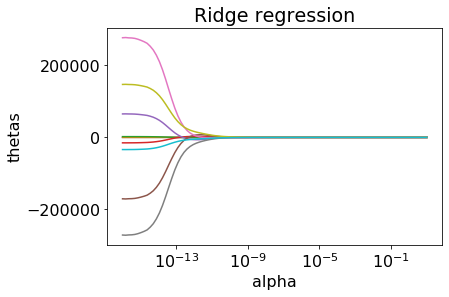

In [10]:
plt.plot(alpha, thetas) # plt.plot(alpha[-30:], thetas[-30:])
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('thetas')
plt.title('Ridge regression')
plt.savefig('figures/ridge_coefs.png',dpi=300)
plt.show()

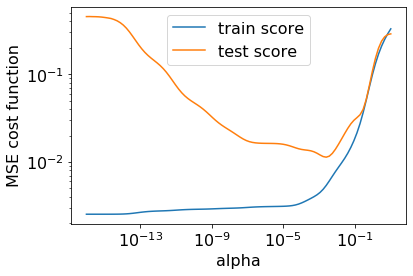

In [11]:
plt.plot(alpha,train_MSE,label='train score')
plt.plot(alpha,test_MSE,label='test score')
plt.semilogy()
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('MSE cost function')
plt.legend()
plt.savefig('figures/train_test_MSE_ridge.png',dpi=300)
plt.show()

## Exercise 3
Which $\alpha$ gives us the best tradeoff between bias and variance?

## <font color='LIGHTGRAY'>Regularization and Logistic Regression</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe why regularization is important and what are the two types of regularization</font>
- **Describe the logistic regression model**
- <font color='LIGHTGRAY'>Describe the cost function with and without regularization in logistic regression</font>


## Logistic regression
- name is misleading, logistic regression is for classification problems!
- **Question 1: What is the mathematical model?**

<center>$y_i' = \frac{1}{1+e^{-z}}$, where</center>
<center>$z = \theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}$</center>
$f(z) = \frac{1}{1+e^{-z}}$ is the sigmoid function.


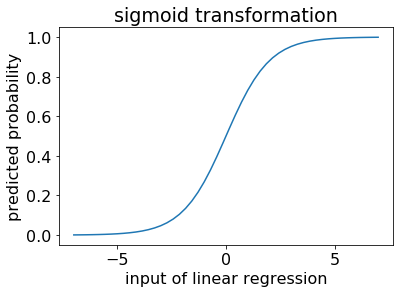

In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-7,7,50)

plt.plot(z,sigmoid(z))
plt.xlabel('input of linear regression')
plt.ylabel('predicted probability')
plt.title('sigmoid transformation')
plt.savefig('figures/sigmoid_trans.png',dpi=300)
plt.show()

## <font color='LIGHTGRAY'>Regularization and Logistic Regression</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe why regularization is important and what are the two types of regularization</font>
- <font color='LIGHTGRAY'>Describe the logistic regression model</font>
- **Describe the cost function with and without regularization in logistic regression**


## Logistic regression
- **Question 2: What is the cost function?**
   - the logloss metric for plain logistic regression

<center>$L(\theta) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(y_i') + (1-y_i)\ln(1-y_i')]$ </center>
<center>$L(\theta) =  - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}})]$</center>

   - the logloss metric with l1 regularization

<center>$L(\theta) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}))] + \color{red}{ \frac{\alpha}{m} \sum_{j=0}^{m}|\theta_j|}$</center>

   - the logloss metric with l2 regularization

<center>$L(\theta) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-\theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}}}))] + \color{red}{\frac{\alpha}{m} \sum_{j=0}^{m} \theta_j^2}$</center>

- **Question 3: What algorithm do we use to find the best $\theta$?**
   - gradient descent

## Logistic regression in sklearn

In [13]:
from sklearn.linear_model import LogisticRegression

log_reg_l1 = LogisticRegression(penalty='l1', C = 1/alpha)
log_reg_l2 = LogisticRegression(penalty='l2', C = 1/alpha)
# fit, predict, predict_proba are available 
# log_reg.coef_ returns the theta values


By now, you can
- Describe why regularization is important and what are the two types of regularization
- Describe the logistic regression model
- Describe the cost function with and without regularization in logistic regression
